# V01 Kosmische Myonen

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import uncertainties.unumpy as unp 
from uncertainties.unumpy import (nominal_values as noms, std_devs as stds)

def f(x,a,b):
    return a*x+b

def gauß(x,a,b,c):
    return a*np.exp(-(x-b)**2/(2*c**2))


In [9]:
df1 = pd.read_csv('data/data1.txt'
                 ,sep = ','
                 ,lineterminator='\n'
                 #,skiprows=(0)
                 ,header = (0)
                 )
df2 = pd.read_csv('data/data2.txt'
                 ,sep = ','
                 ,lineterminator='\n'
                 ,header = 0
                 ,skiprows = (0,1)
                 ,names = ['Puls','Bin']
                 )
df3 = pd.read_csv('data/data3.txt'
                 ,lineterminator='\n'
                 ,names = ['Count']
                 )

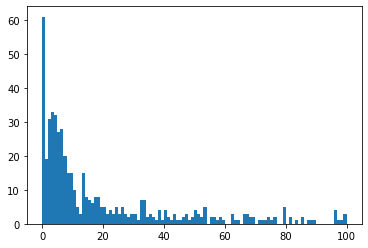

In [11]:
plt.hist(df3['Count'],bins = 100,range = (0,100));

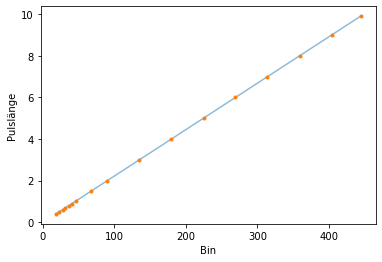

In [12]:
params1,cov = curve_fit(f,df2['Bin'],df2['Puls'])
errors = np.sqrt(np.diag(cov))
params1_err = unp.uarray(params1,errors)
err = params1_err[0]*df2['Bin']+params1_err[1]

plt.plot(df2['Bin'],f(df2['Bin'],*params1),alpha = 0.5)
plt.plot(df2['Bin'],df2['Puls'],'.')
plt.xlabel('Bin')
plt.ylabel('Pulslänge')
None

In [12]:
#f(np.arange(512)[df3['Count'] != 0],*params1)
df3[df3['Count'] != 0].to_numpy()

array([[287],
       [100],
       [243],
       [ 81],
       [ 97],
       [ 98],
       [ 89],
       [100],
       [ 74],
       [ 79],
       [ 96],
       [ 96],
       [ 87],
       [ 79],
       [ 85],
       [ 79],
       [ 96],
       [ 67],
       [ 72],
       [ 83],
       [ 96],
       [ 81],
       [ 76],
       [ 74],
       [ 69],
       [ 99],
       [ 85],
       [ 88],
       [ 69],
       [ 75],
       [ 66],
       [ 79],
       [ 68],
       [ 53],
       [ 62],
       [ 71],
       [ 67],
       [ 76],
       [ 79],
       [ 58],
       [ 73],
       [ 50],
       [ 55],
       [ 66],
       [ 63],
       [ 67],
       [ 56],
       [ 57],
       [ 64],
       [ 59],
       [ 58],
       [ 55],
       [ 51],
       [ 68],
       [ 47],
       [ 44],
       [ 66],
       [ 56],
       [ 52],
       [ 53],
       [ 51],
       [ 62],
       [ 50],
       [ 51],
       [ 49],
       [ 41],
       [ 45],
       [ 46],
       [ 53],
       [ 38],
       [ 62],
      

array([[287],
       [100],
       [243],
       [ 81],
       [ 97],
       [ 98],
       [ 89],
       [100],
       [ 74],
       [ 79],
       [ 96],
       [ 96],
       [ 87],
       [ 79],
       [ 85],
       [ 79],
       [ 96],
       [ 67],
       [ 72],
       [ 83],
       [ 96],
       [ 81],
       [ 76],
       [ 74],
       [ 69],
       [ 99],
       [ 85],
       [ 88],
       [ 69],
       [ 75],
       [ 66],
       [ 79],
       [ 68],
       [ 53],
       [ 62],
       [ 71],
       [ 67],
       [ 76],
       [ 79],
       [ 58],
       [ 73],
       [ 50],
       [ 55],
       [ 66],
       [ 63],
       [ 67],
       [ 56],
       [ 57],
       [ 64],
       [ 59],
       [ 58],
       [ 55],
       [ 51],
       [ 68],
       [ 47],
       [ 44],
       [ 66],
       [ 56],
       [ 52],
       [ 53],
       [ 51],
       [ 62],
       [ 50],
       [ 51],
       [ 49],
       [ 41],
       [ 45],
       [ 46],
       [ 53],
       [ 38],
       [ 62],
      

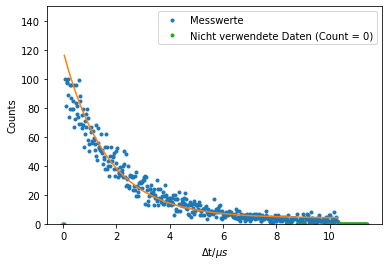

In [13]:
def e(x,A,B,C):
    return A*np.exp(-B*x)+C

xdata = f(np.arange(512)[df3['Count'] != 0],*params1)
ydata = df3[df3['Count'] != 0]['Count'].to_numpy()

params2,cov = curve_fit(e
                        ,xdata
                        ,ydata
                       )
errors = np.sqrt(np.diag(cov))
params2_err = unp.uarray(params2,errors)
err = params2_err[0]*xdata+params2_err[1]

plot_errorbar = False

if plot_errorbar:
    plt.errorbar(f(np.arange(512)[df3['Count'] != 0],*params1)
                 ,df3[df3['Count'] != 0]['Count'].to_numpy()
                 ,yerr = np.sqrt(df3['Count'])
                 ,fmt = '.'
                 ,label = 'Messwerte'
                 ,alpha = 0.5
                 ,ecolor = 'k'
                )
else:
    plt.plot(xdata
             ,ydata
             ,'.'
             ,label = 'Messwerte'
            )
    
plt.plot(xdata
         ,e(xdata,*params2)
        )
plt.plot(f(np.arange(512)[df3['Count'] == 0],*params1)
         ,df3[df3['Count'] == 0]['Count'].to_numpy()
         ,'.'
         ,label = 'Nicht verwendete Daten (Count = 0)'
        )
plt.ylim((0,150))
# plt.xlim((0,10))
plt.xlabel(f'$\Delta$t/$\mu s$')
plt.ylabel(f'Counts')
plt.legend(loc = 'best')
None

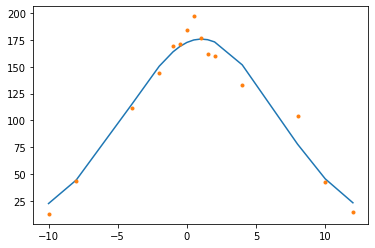

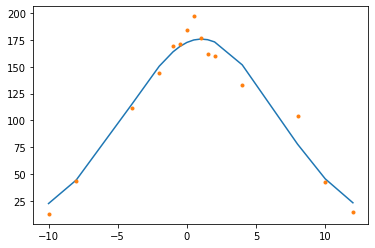

In [14]:
params3,cov = curve_fit(gauß,df1['Delay'],df1['Rate'])
errors = np.sqrt(np.diag(cov))
params3_err = unp.uarray(params3,errors)
err = params1_err[0]*df1['Delay']+params1_err[1]

plt.plot(df1['Delay'],gauß(df1['Delay'],*params3))
plt.plot(df1['Delay'],df1['Rate'],'.');